<a href="https://colab.research.google.com/github/zevy613/Project-2/blob/main/Project2_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
filename = "/content/drive/MyDrive/Colab Notebooks/CodingDojo/Project#2/heart.csv"
df = pd.read_csv(filename)
#lets copy our data set
df_ml = df.copy()
df_ml.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Checking to see if we have any duplicate rows or any null values.

In [26]:
print("Number of duplicate rows : ", df_ml.duplicated().sum())
print("Number of missing values : ", df_ml.isna().sum().sum())

Number of duplicate rows :  0
Number of missing values :  0


Lets get some stats for our data set.

In [27]:
df_ml.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Lets check to see if our data is balanced.

In [28]:
df_ml['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

Our data is very well balanced

Lets make some visualizations of our data.

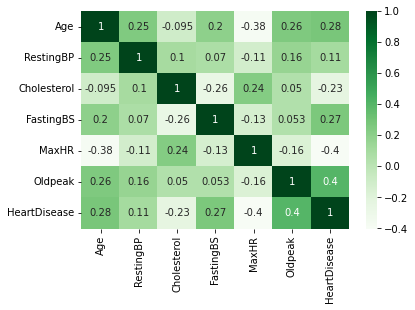

In [29]:
corr = df.corr()
sns.heatmap(corr, cmap='Greens', annot=True)

From the above heatmap we can see that there are no immediate correlation between the columns of our data.

Text(0.5, 1.0, 'Chest Pain Distibution')

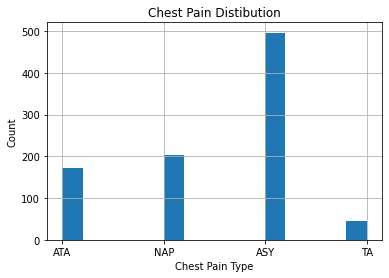

In [30]:
df_ml['ChestPainType'].hist(bins = 'auto')
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.title("Chest Pain Distibution")

From the above bar chart we can see the distibution of chest pain. We can see that ASY is the greatest and TA is the fewest.

Text(0.5, 1.0, 'Resting Blood Pressure by Age')

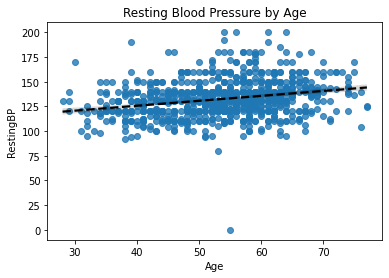

In [31]:
sns.regplot(data=df_ml, x='Age', y='RestingBP', line_kws={'color': 'black', 'ls': '--'})
plt.title("Resting Blood Pressure by Age")

We can see that most of the data points when comparing Age and Resting Blood Pressure are close with only a few exceptions.

#Part - 3

In [32]:
#Lets filter the rows by people who have and don't have heart disease.
heartD = df_ml[df_ml['HeartDisease']==1]
heartDont = df_ml[df_ml['HeartDisease']==0]

Lets first get the precentage of heart disease based on gender.

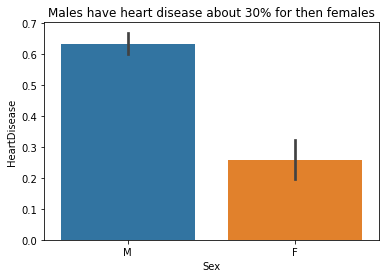

In [33]:
sns.barplot(data=df_ml, x='Sex', y='HeartDisease')
plt.title("Males have heart disease about 30% for then females");

From the graph below we can see that people who are asymptomatic with their chest pain are more at risk. This makes sense because people who don't have any symptomes don't know that there is a problem that needs to be addressed. This shows that regular check ups and frequent testing can prevent heart disease.

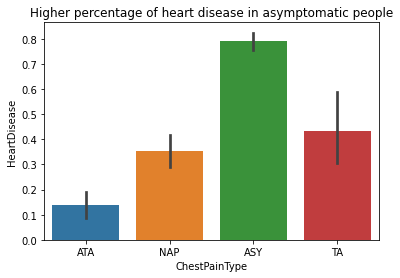

In [34]:
sns.barplot(data=df_ml, x='ChestPainType', y='HeartDisease')
plt.title("Higher percentage of heart disease in asymptomatic people");

The following graphs show that people who have exercise angina and a flat or down ST slope are more at risk of getting heart disease.

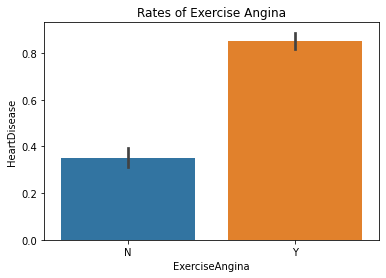

In [35]:
sns.barplot(data=df_ml, x='ExerciseAngina', y='HeartDisease');
plt.title("Rates of Exercise Angina");

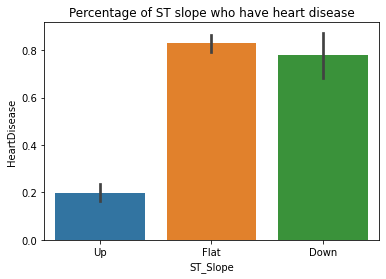

In [36]:
sns.barplot(data=df_ml, x='ST_Slope', y='HeartDisease');
plt.title("Percentage of ST slope who have heart disease");

#Other Graphs the we could explore

In [37]:
# #For males
# m_gender_selector = df_ml['Sex']=='M'
# sns.countplot(data=df_ml[m_gender_selector], x='ChestPainType', hue='HeartDisease')
# plt.title("Males - Heart Disease - Chest Pain")


# #For females
# f_gender_selector = df_ml['Sex']=='F'
# sns.countplot(data=df_ml[f_gender_selector], x='ChestPainType', hue='HeartDisease')
# plt.title("Females - Heart Disease - Chest Pain")


# From the data set provided we can see form the graph below, that a disproportionate number of males are getting heart disease.
# rprint
# print("Number of men : ", len(df_ml[df_ml['Sex']=='M']))
# print("Number of women : ", len(df_ml[df_ml['Sex']=='F']))

# sns.countplot(data=df_ml, x='HeartDisease', hue='Sex')
# plt.title("Distribution of Heat Diseases per Gender");


# sns.countplot(data=df_ml, x='ChestPainType', hue='HeartDisease')


#Lets begin our data pre-processing

Lets now split our data into our features matrix and target column.

In [38]:
X = df_ml.drop(columns='HeartDisease')
y = df_ml['HeartDisease']

Lets perform train/test split so we dont have any data leakage.

In [39]:
X_train, X_teset, y_train, y_test = train_test_split(X, y, random_state=42)